<a href="https://colab.research.google.com/github/ZinnurovArtur/Colour-Mathcer/blob/main/image_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np 
import os
from keras.layers import Dense, Flatten,Reshape, Input,InputLayer
from keras.models import Sequential,Model 

from matplotlib import pyplot as plt 
import random 
import tensorflow as tf 
import os 
from PIL import Image 
from google.colab.patches import cv2_imshow
import cv2
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
import matplotlib.image as mpimg
%matplotlib inline

Mounted at /content/drive/


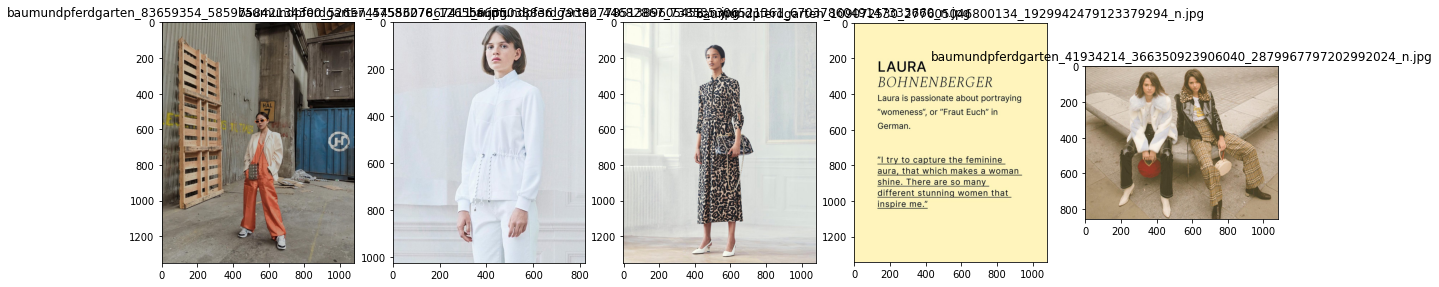

In [27]:
img_width = 200
img_height = 200
from google.colab import drive
from keras.datasets import fashion_mnist

drive.mount('/content/drive/',force_remount=True)
img_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/pictures_outfit/bauman'
plt.figure(figsize=(20,20))

for i in range(5):
  file = random.choice(os.listdir(img_folder))
  image_path = os.path.join(img_folder,file)
  img = mpimg.imread(image_path)
  ax = plt.subplot(1,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)


def create_dataset_PIL(img_folder):
  img_data_arr = [] 
  class_name = [] 
  for dir1  in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder,dir)):
        image_path= os.path.join(img_folder, dir1,  file)
        image= np.array(Image.open(image_path))
        image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
        image = image.astype('float32')
        image /= 255  
        img_data_arr.append(image)
        class_name.append(dir1)
  return img_data_arr,class_name

  



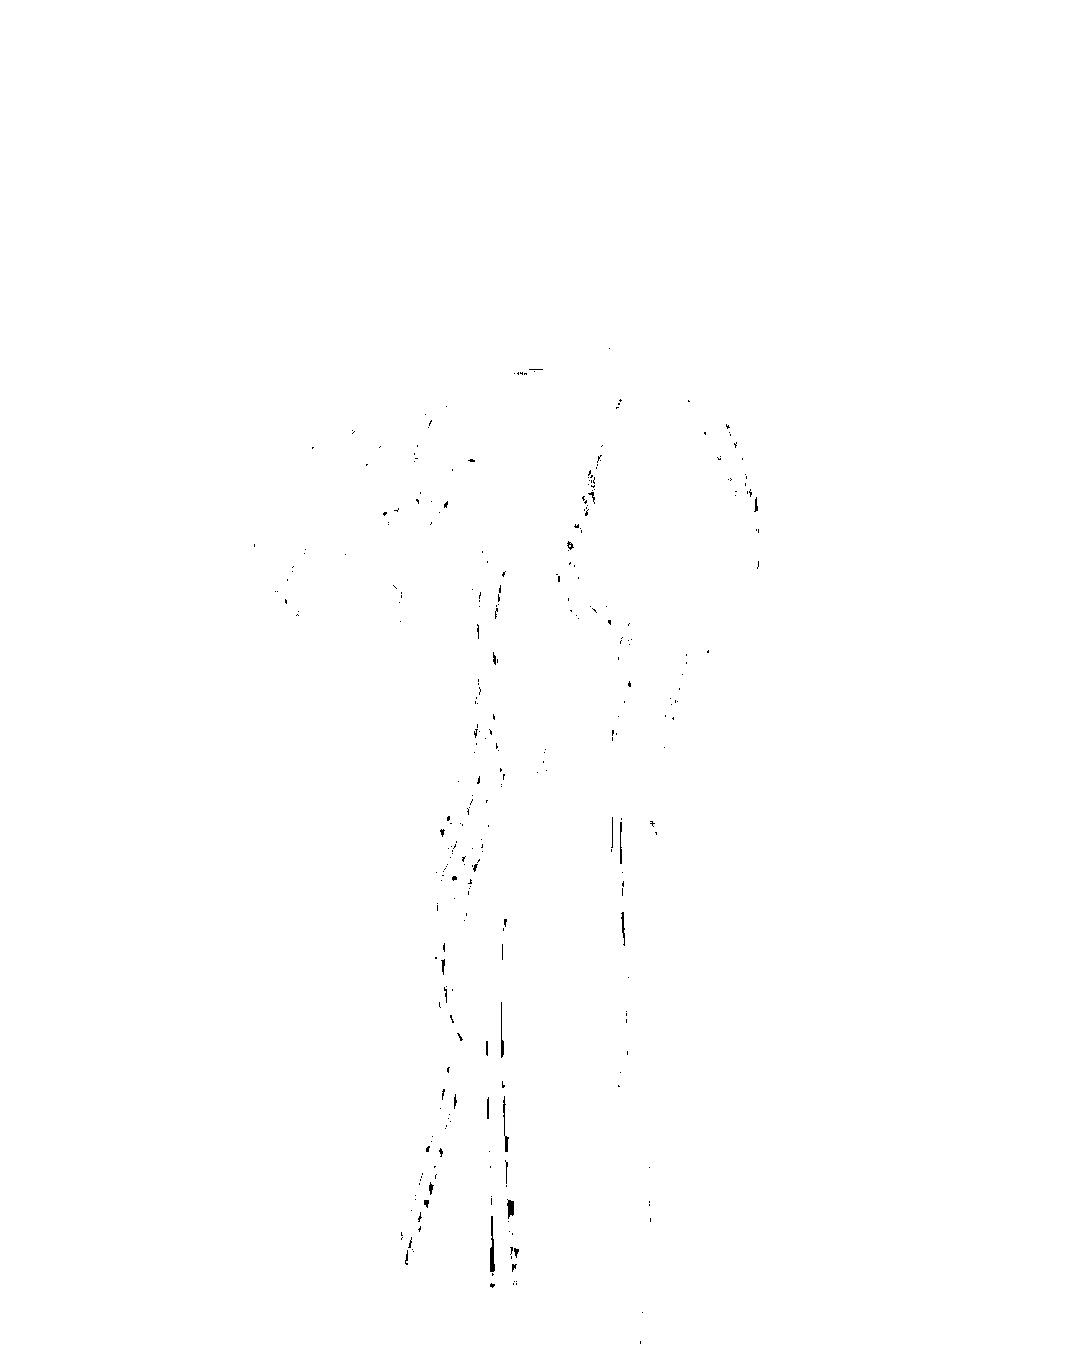

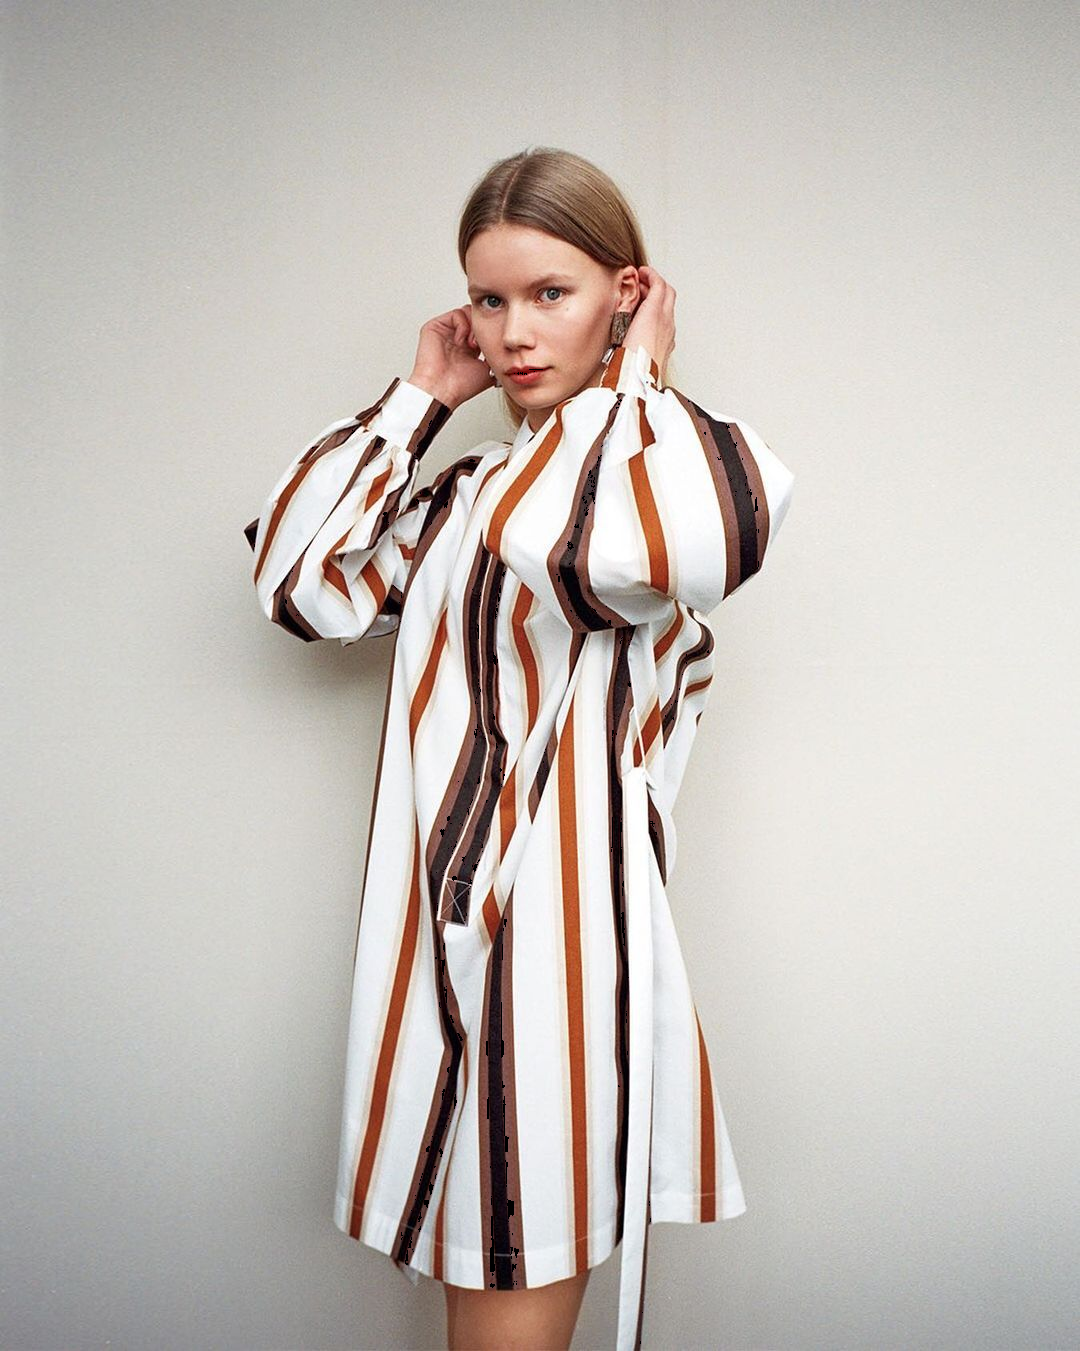

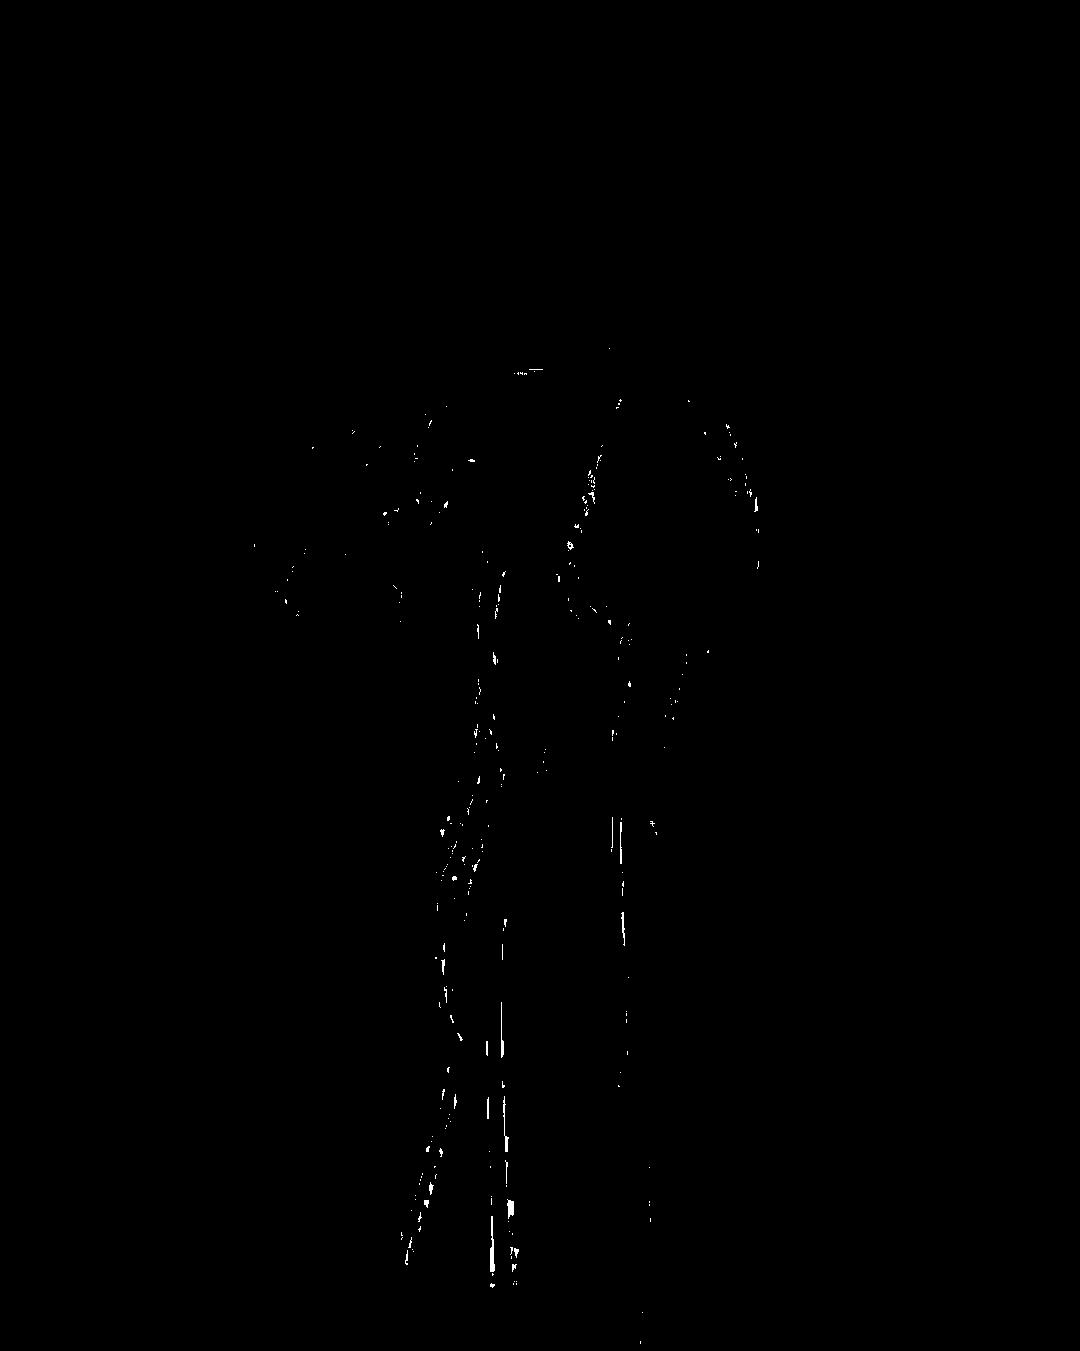

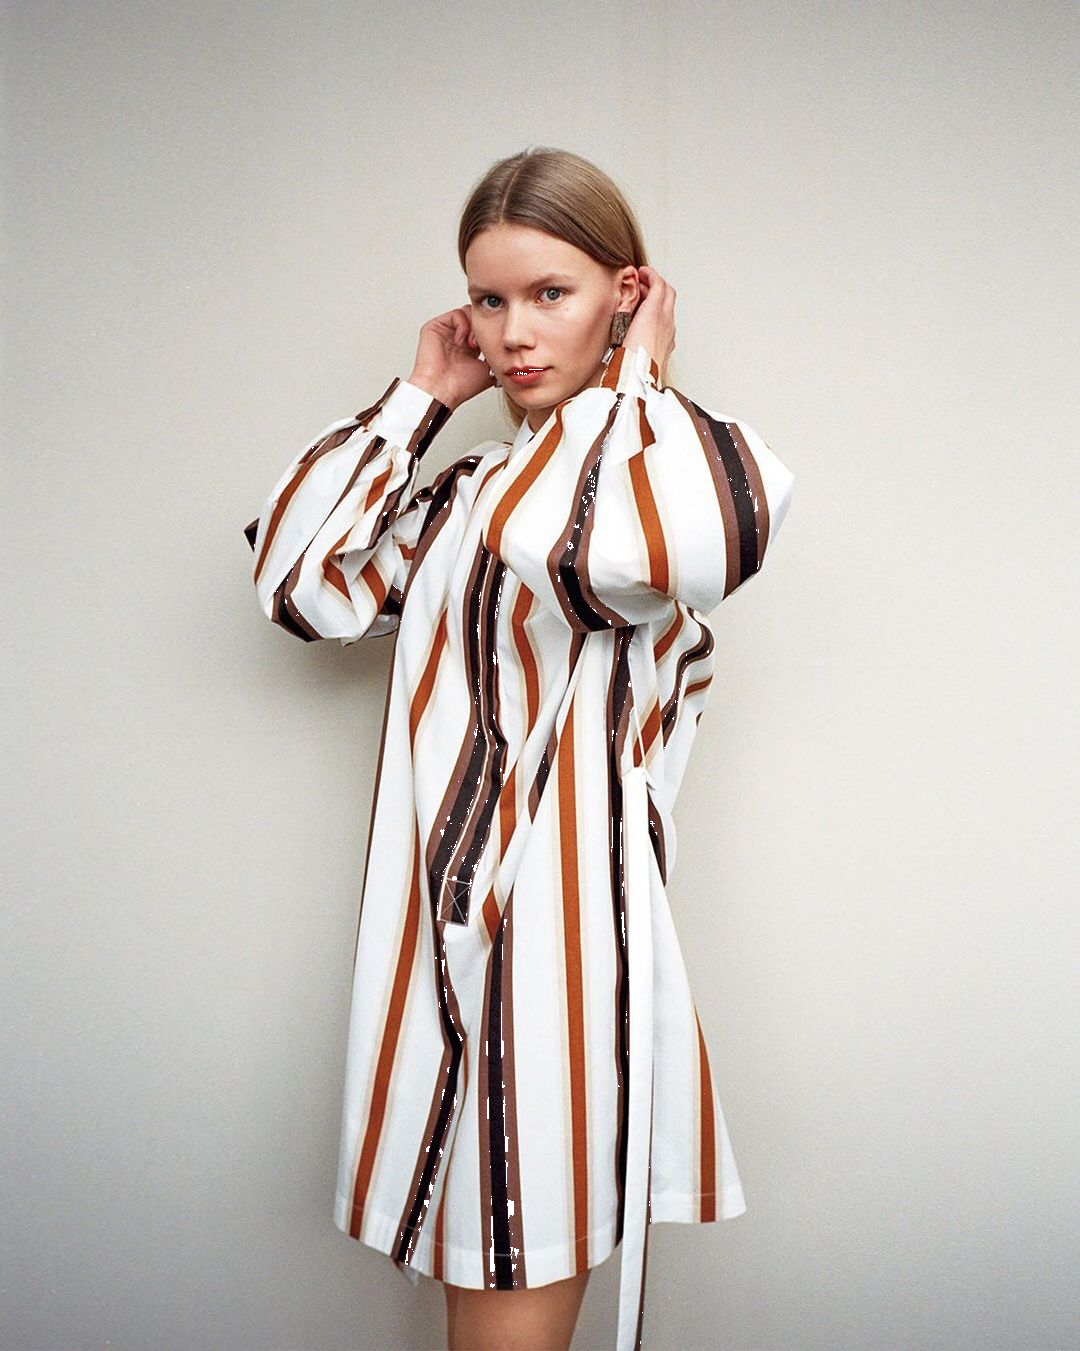

In [26]:
# edge detection 

frame = cv2.imread('/content/drive/MyDrive/Colab Notebooks/datasets/pictures_outfit/bauman/baumundpferdgarten_106915056_600072320905456_1611934786290419901_n.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#green color HSV 
upper_green = np.array([255,255,255])
lower_green = np.array([40,52,72])

#Threshold the HSV image to get only blue colors 
mask_white = cv2.inRange(hsv,lower_green,upper_green)
mask_black = cv2.bitwise_not(mask_white)

#converting mask black to 3 channels
W,L = mask_black.shape
mask_black_3CH = np.empty((W,L,3),dtype=np.uint8)
mask_black_3CH[:, :, 0] = mask_black
mask_black_3CH[:, :, 1] = mask_black
mask_black_3CH[:, :, 2] = mask_black


cv2_imshow(mask_black_3CH)
dst3 = cv2.bitwise_and(mask_black_3CH,frame)
cv2_imshow(dst3)

W,L = mask_white.shape
mask_white_3CH = np.empty((W, L, 3), dtype=np.uint8)
mask_white_3CH[:, :, 0] = mask_white
mask_white_3CH[:, :, 1] = mask_white
mask_white_3CH[:, :, 2] = mask_white

cv2_imshow(mask_white_3CH)
dst3_wh = cv2.bitwise_or(mask_white_3CH,dst3)
cv2_imshow(dst3_wh)